In [62]:
from nltk.tokenize import TweetTokenizer
import nltk
tknzr = TweetTokenizer()


In [63]:
class Words:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0
      
    def index_words(self, sentence):
        for word in tknzr.tokenize(sentence.lower()):
            self.index_word(word)

    def index_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('seek_jobs.csv')

In [66]:
df.head()

,listingDate,location,title,teaser,companyName
0,2018-03-15T13:00:00Z,Melbourne,Front End Developer,Rare permanent role at multi-award winning onl...,None
1,2018-03-15T13:00:00Z,Melbourne,.NET Developer,"Are you a highly skilled, .NET Developer looki...",None
2,2018-03-16T06:32:10Z,Melbourne,PHP <b>Developer</b>,LEADING DIGITAL AGENCY| FAST GROWING COMPANY|G...,Opus Recruitment Solutions
3,2018-03-16T03:32:07Z,Melbourne,C# .Net <b>Developer</b> / Programmer,Permanent position in N.W. subs of Melbourne f...,Australia Wide Personnel
4,2018-03-16T06:06:45Z,Melbourne,Web <b>Developer</b>,You'll work closely with internal project team...,Jacobs


In [67]:
titles = df["title"].values
teasers = df["teaser"].values
words = Words('words')

In [69]:
for title in titles:
    words.index_words(title)
for teaser in teasers:
    words.index_words(teaser)

In [107]:
filter_dict = {'asp.net':1,'node':1,'nodejs':1,'full-stack':1,'python':1,'php':1,'ios':1,'android':1,'docker':1,'aws':1,'javascript':1,'vue':1,'java':1,'net':1,'react':1,'angularjs':1,'angular':1}

In [110]:
data = []
labels = []
for k,v in words.word2count.items():
    if k in filter_dict:
        labels.append(k)
        data.append(v)

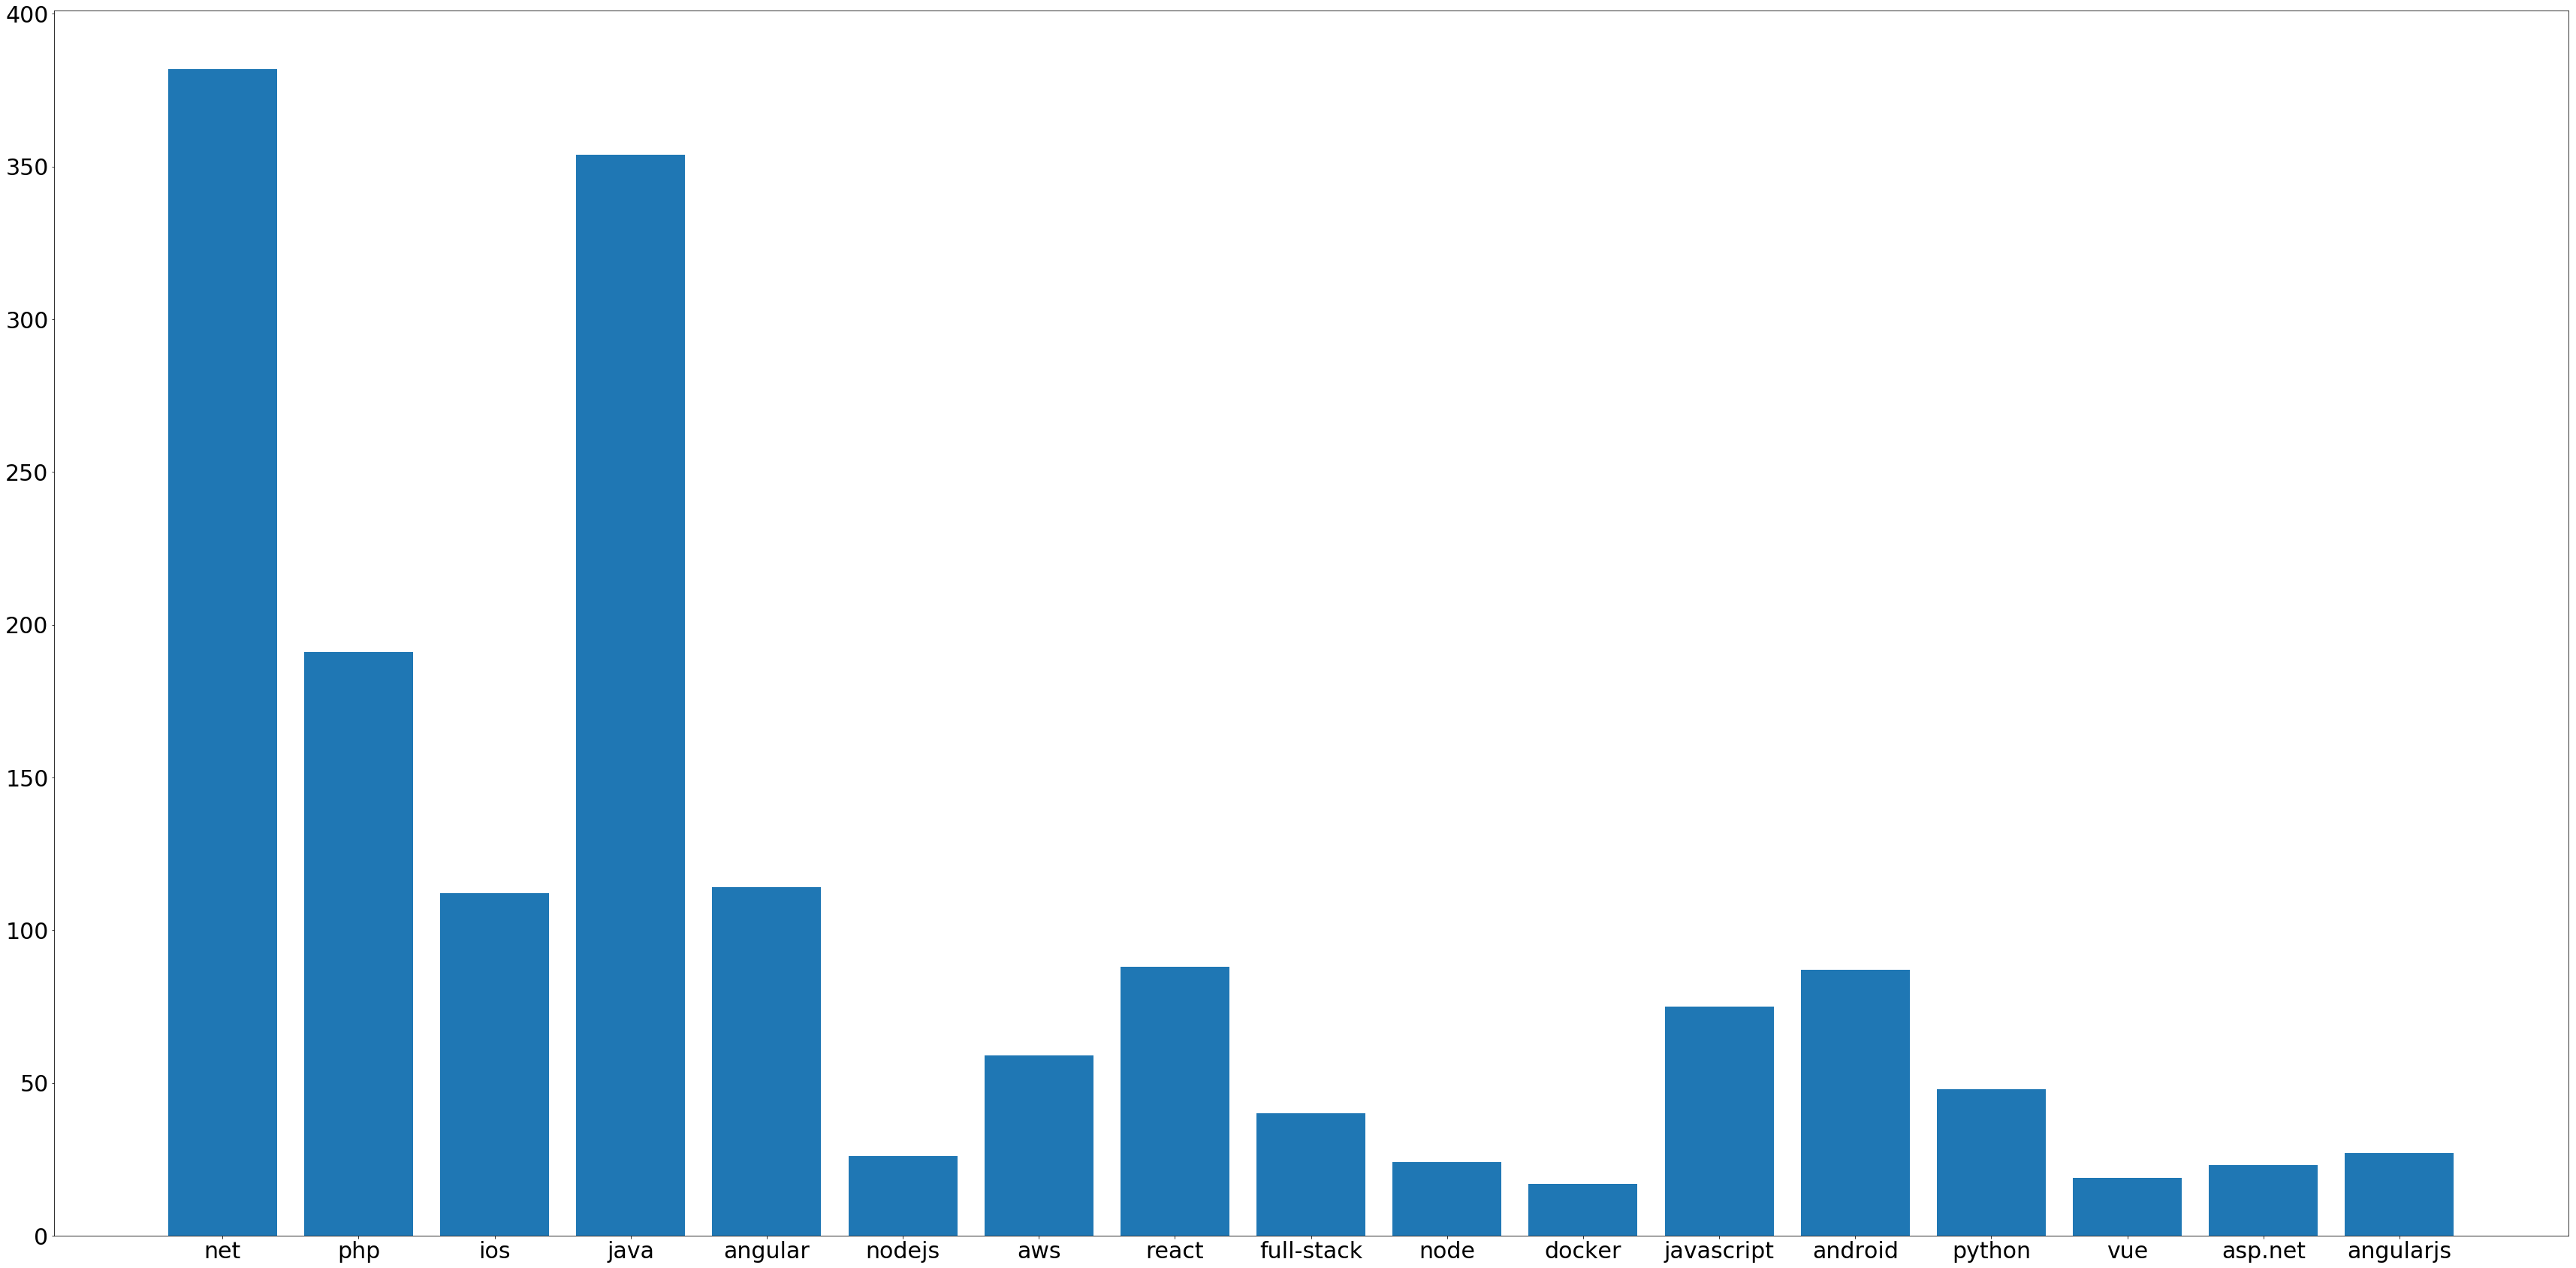

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,30))
plt.bar(range(len(data)), data, tick_label=labels)
plt.tick_params(labelsize=30)
plt.show()